In [1]:
import numpy as np
import matplotlib.pyplot as plt
import spectra as s
import scipy.constants as consts
import scipy.signal as sig

## Get mean of galactic pointed data

In [2]:
mean = np.load('GALACTIC/GALACTICmean.npz')['data']

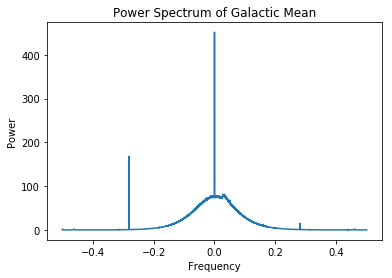

In [3]:
s.plot_power(mean, 'Galactic Mean')

## Get Line Shape Calibration

In [4]:
soff = np.load('soff.npz')['data']

In [5]:
line = mean/soff

<IPython.core.display.Javascript object>


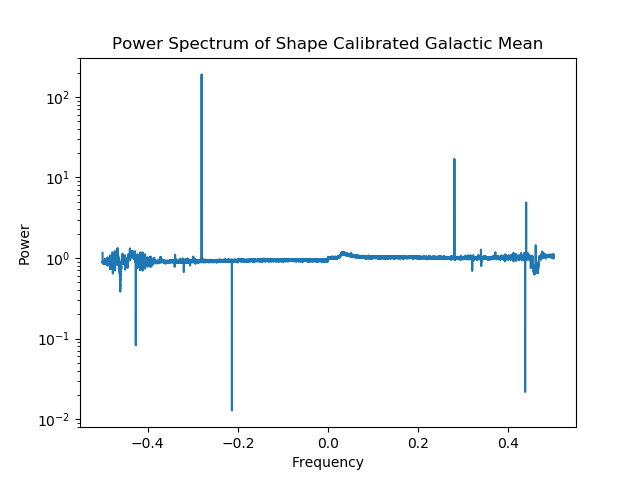

In [7]:
%matplotlib notebook
s.plot_power(line, 'Shape Calibrated Galactic Mean')

In [8]:
scal = np.load('scal.npz')['data']
scold = np.load('scold.npz')['data']

<IPython.core.display.Javascript object>


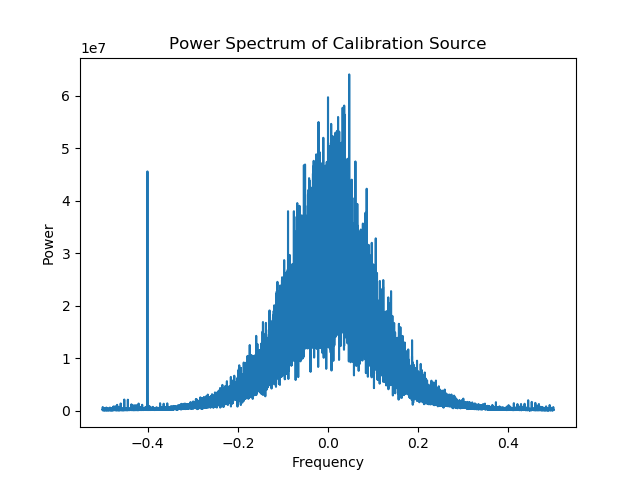

In [9]:
s.plot_power(scal, 'Calibration Source')

In [10]:
G = s.gain(300, scal, scold)
G

182.18251393759849

In [11]:
line = G*line

<IPython.core.display.Javascript object>


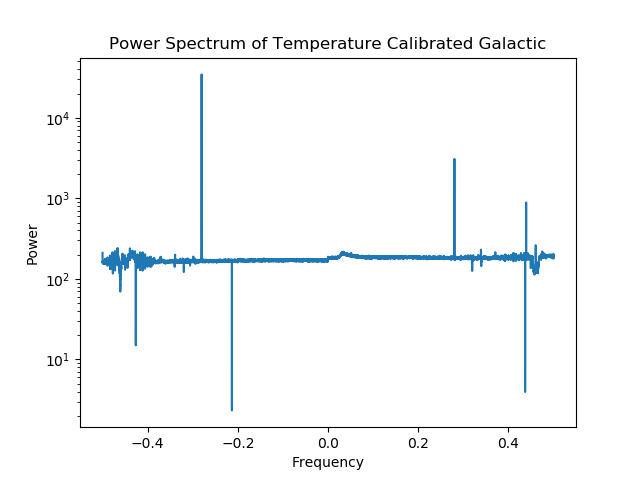

In [12]:
s.plot_power(line, 'Temperature Calibrated Galactic')

In [13]:
freqs = np.fft.fftfreq(len(line), 7/62.5)
print(min(freqs), max(freqs))

-4.46428571429 4.46372767857


### Now going to rf frequency, focusing on positive frequencies

In [14]:
positivevals = line[:int(len(line)/2)]
positivefreqs = freqs[:int(len(freqs)/2)]

<IPython.core.display.Javascript object>


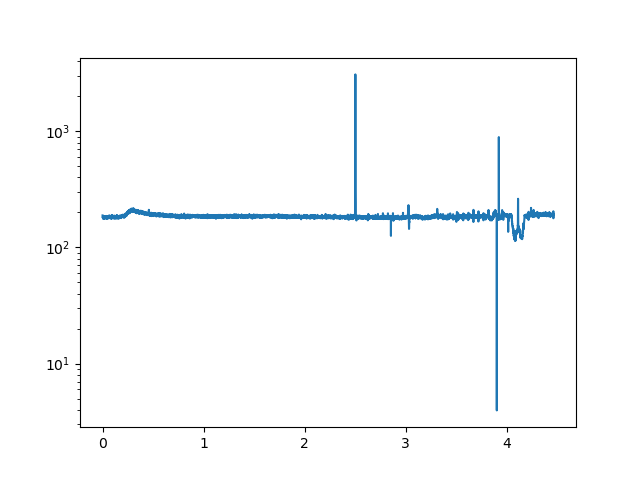

In [15]:
plt.plot(positivefreqs, positivevals)
plt.show()

## Need to get appropriate frequency array values

In [16]:
conversion = 1230+190
rf = positivefreqs+conversion

<IPython.core.display.Javascript object>


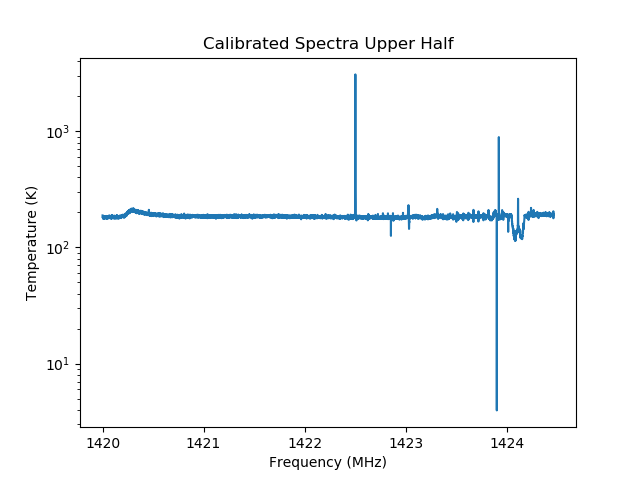

In [17]:
plt.plot(rf, positivevals)
plt.title('Calibrated Spectra Upper Half')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Temperature (K)')
plt.show()

In [18]:
v0 = 1420.4 #MHz
deltaf = rf - v0
v = -consts.c*deltaf/v0

<IPython.core.display.Javascript object>


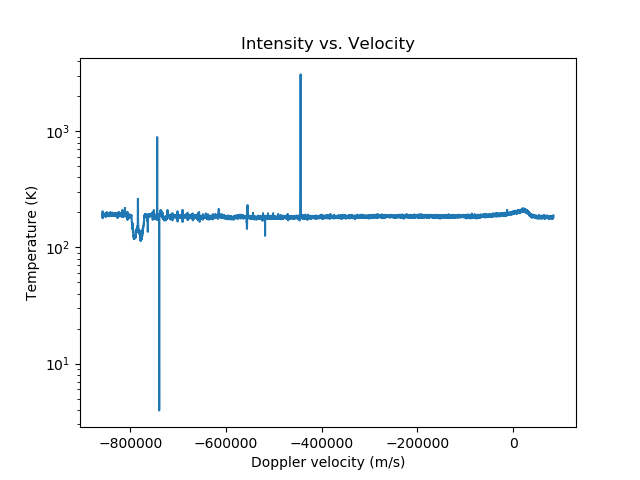

In [19]:
plt.plot(v, positivevals)
plt.title("Intensity vs. Velocity")
plt.xlabel("Doppler velocity (m/s)")
plt.ylabel("Temperature (K)")
plt.show()

In [42]:
data = positivevals
freqs = rf
data = np.array_split(data, 800)
data = [np.mean(i) for i in data]
freqs = np.array_split(freqs, 800)
freqs = [np.mean(i) for i in freqs]


<IPython.core.display.Javascript object>


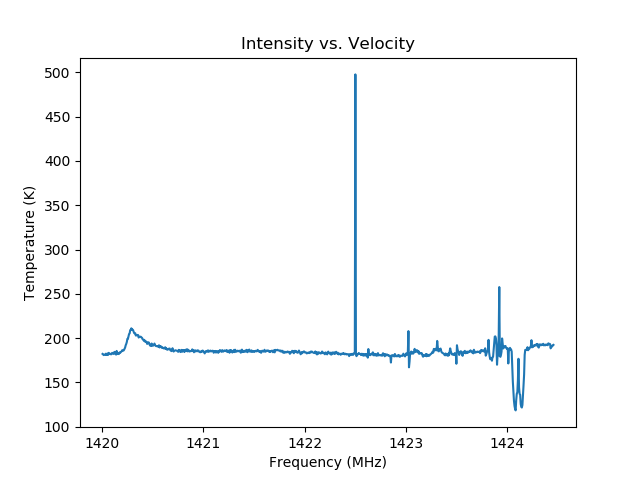

In [44]:
plt.plot(freqs, data)
plt.title("Intensity vs. Velocity")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Temperature (K)")
plt.show()